In [1]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import dateutil.parser
import nltk
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\ISHITA GUPTA\\OneDrive\\Desktop\\html work\\Pandas\\Data\\Internship\\test(in).csv")

In [3]:
df

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,05-10-2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com
...,...,...,...,...
2186,Re: Resume,Thanks for the resume. She has had some good ...,6/17/2011,johnny.palmer@enron.com
2187,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",Attached please find the following documents:\...,1/20/2011,johnny.palmer@enron.com
2188,(No Subject),Good to finally hear from. Judging from your ...,01-02-2011,don.baughman@enron.com
2189,League is Set,It looks like we have our 12 teams. We will p...,03-11-2011,rhonda.denton@enron.com


In [4]:
def try_parse_date(val):
    try:
        return dateutil.parser.parse(val)
    except:
        return pd.NaT

df['date'] = df['date'].apply(try_parse_date)
df['month'] = df['date'].dt.to_period('M').astype(str)

# Data Preprocessing

We imported the necessary libraries and loaded the dataset. The 'date' column was parsed into datetime format, and a new 'month' column was created for easier analysis.


In [5]:
df

,Subject,body,date,from,month
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,2010-05
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,2010-07
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,2011-07
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,2010-03
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,2011-05
...,...,...,...,...,...
2186,Re: Resume,Thanks for the resume. She has had some good ...,2011-06-17,johnny.palmer@enron.com,2011-06
2187,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",Attached please find the following documents:\...,2011-01-20,johnny.palmer@enron.com,2011-01
2188,(No Subject),Good to finally hear from. Judging from your ...,2011-01-02,don.baughman@enron.com,2011-01
2189,League is Set,It looks like we have our 12 teams. We will p...,2011-03-11,rhonda.denton@enron.com,2011-03


In [6]:
df.shape

(2191, 5)

# Exploratory Data Analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Subject  2191 non-null   object        
 1   body     2191 non-null   object        
 2   date     2191 non-null   datetime64[ns]
 3   from     2191 non-null   object        
 4   month    2191 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 85.7+ KB


In [8]:
df.isnull().sum()

Subject    0
body       0
date       0
from       0
month      0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Data Overview

The dataset has no null values, as confirmed by `df.isnull().sum()`. Also there are no duplicated in the data.


# Sentiment Labeling

In [10]:
nltk.download('vader_lexicon')

# Initialize analyzer
sia = SentimentIntensityAnalyzer()

# Sentiment classification
def classify_sentiment(text):
    scores = sia.polarity_scores(str(text))
    compound = scores['compound']
    if compound >= 0.02:
        return 'Positive'
    elif compound <= -0.02:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to the 'body' column
df['Sentiment'] = df['body'].apply(classify_sentiment)
df['Sentiment']


[nltk_data] Downloading package vader_lexicon to C:\Users\ISHITA
[nltk_data]     GUPTA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0       Positive
1       Positive
2        Neutral
3        Neutral
4       Positive
          ...   
2186    Positive
2187    Positive
2188    Positive
2189    Positive
2190    Positive
Name: Sentiment, Length: 2191, dtype: object

In [11]:
df['Sentiment'].value_counts()

Sentiment
Positive    1543
Neutral      490
Negative     158
Name: count, dtype: int64

In [12]:
df[df['Sentiment']=='Negative']['body'].values


array(["The start time for Tuesday morning has been changed from 9am to 8am.  \nBreakfast will be served at 7:30.  Therefore, shuttle pick up times at the \nhotel for Tuesday morning have been changed to 7:10, 7:25, and 7:40 am.  \nAgain, the last shuttle is not recommended if you intend to have breakfast at \nthe ASE.\n\nSome of you had asked about a coordinated dinner for Sunday night.  Since \narrival times into Dallas vary greatly, we are leaving you to your own \ndevices for Sunday night.  We are however, planning a group dinner for Monday \nnight after we wrap up for the day.  We will arrange transportation from the \nASE to the restaurant and from the restaurant back to the hotel.  Currently, \nMonday's agenda shows a completion time of 6:30pm.  Therefore, we are \nplanning to head to dinner directly from the ASE without a break or trip back \nto the hotel. \n",
       'kiss my ass now bitch!\n\n\n   \n\n\nFrom:  Bryan Hull                                                        

- Earlier I set the threshold to (-0.5,0.5) but it led to a large proportion of the corporate email texts being classified as Neutral.However, corporate communication often uses formal and subtle language, where even slightly positive or negative tones carry meaningful sentiment. As a result:Many messages with mild sentiment (e.g., compound scores between -0.05 and +0.05) were getting labeled as Neutral even when they expressed slight concern, approval, or disapproval.

- But with new threshold (-0.02,0.02) it capture subtle sentiment shifts more accurately.Reduce over-classification into the Neutral category.Make the sentiment analysis more aligned with the formal tone of corporate emails.

C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\1300088230.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Sentiment', data=df, palette='Set2')


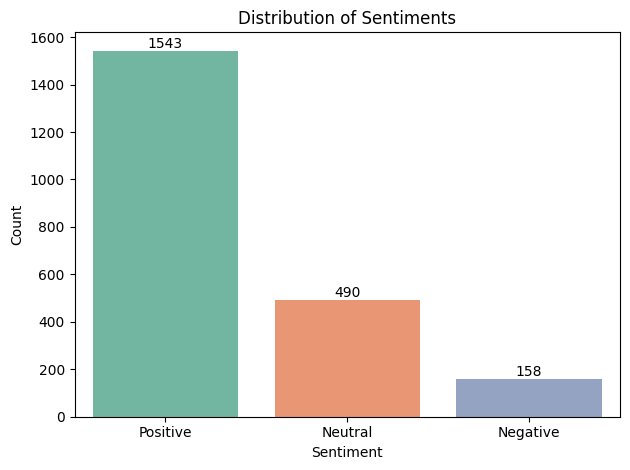

In [13]:
ax=sns.countplot(x='Sentiment', data=df, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

We can see that positive sentiments are the highest followed by neutral and negative sentiments. This shows there is a positive working environment and achievement of goals.

# Employee Score Calculation

In [14]:
def sent_score(str):
    if str=='Positive':
        return 1
    elif str=='Negative':
        return -1
    else:
        return 0
df['Sentiment_score']=df['Sentiment'].apply(sent_score)

# Step 3: Group by employee and month, then sum the scores
monthly_score=df.groupby(['from','month'])['Sentiment_score'].sum().reset_index()

# Step 4: Rename column
monthly_score.rename(columns={'Sentiment_score':'monthly_sentiment_score'},inplace=True)

# Step 5: Merge back into original DataFrame
df=pd.merge(df,monthly_score,on=['from','month'],how='left')
df

,Subject,body,date,from,month,Sentiment,Sentiment_score,monthly_sentiment_score
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,2010-05,Positive,1,6
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,2010-07,Positive,1,15
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,2011-07,Neutral,0,9
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,2010-03,Neutral,0,5
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,2011-05,Positive,1,20
...,...,...,...,...,...,...,...,...
2186,Re: Resume,Thanks for the resume. She has had some good ...,2011-06-17,johnny.palmer@enron.com,2011-06,Positive,1,12
2187,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",Attached please find the following documents:\...,2011-01-20,johnny.palmer@enron.com,2011-01,Positive,1,9
2188,(No Subject),Good to finally hear from. Judging from your ...,2011-01-02,don.baughman@enron.com,2011-01,Positive,1,2
2189,League is Set,It looks like we have our 12 teams. We will p...,2011-03-11,rhonda.denton@enron.com,2011-03,Positive,1,10


# Ranked list of employees


📅 Month: 2010-05

🔝 Top 3 Positive Employees:
                         from  monthly_sentiment_score
23     don.baughman@enron.com                       16
139  patti.thompson@enron.com                        9
0        sally.beck@enron.com                        6

🔻 Top 3 Negative Employees:
                            from  monthly_sentiment_score
176      johnny.palmer@enron.com                        1
153  bobette.riner@ipgdirect.com                        2
394        john.arnold@enron.com                        3


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


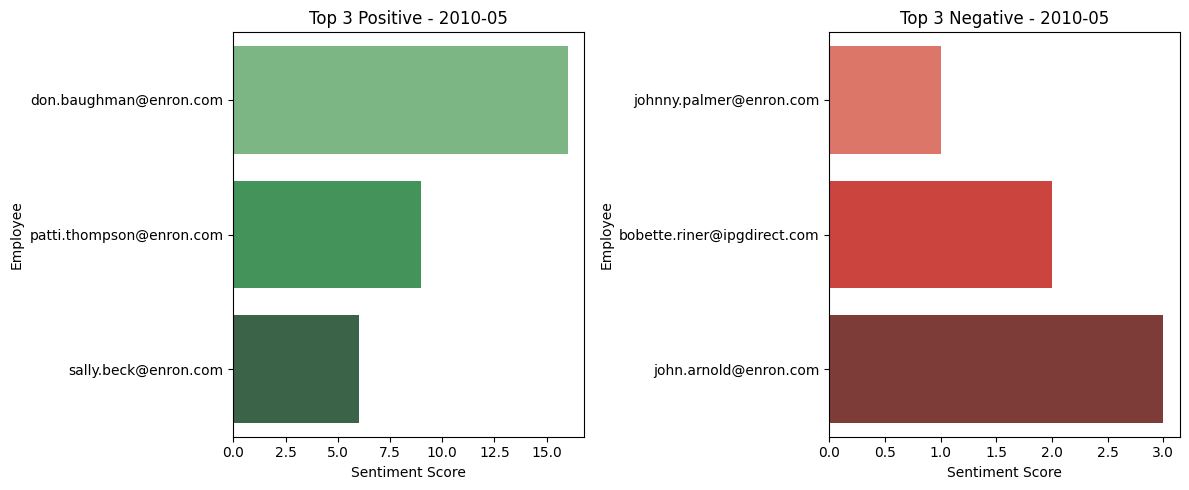


📅 Month: 2010-07

🔝 Top 3 Positive Employees:
                            from  monthly_sentiment_score
1            eric.bass@enron.com                       15
232      lydia.delgado@enron.com                        8
22   bobette.riner@ipgdirect.com                        8

🔻 Top 3 Negative Employees:
                         from  monthly_sentiment_score
506  patti.thompson@enron.com                        1
43     don.baughman@enron.com                        2
560   johnny.palmer@enron.com                        3


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


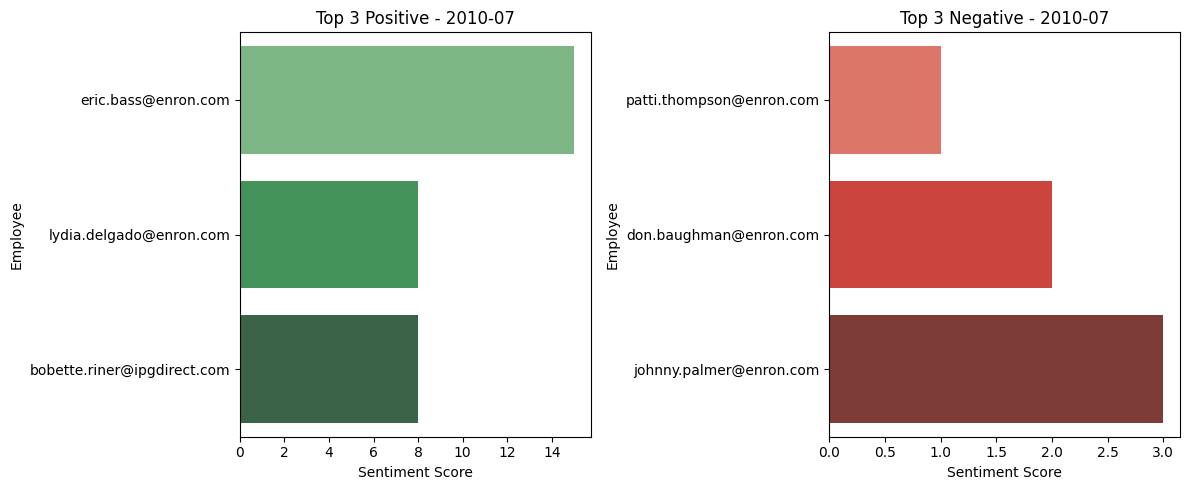


📅 Month: 2011-07

🔝 Top 3 Positive Employees:
                         from  monthly_sentiment_score
327  patti.thompson@enron.com                       16
2        sally.beck@enron.com                        9
27      john.arnold@enron.com                        8

🔻 Top 3 Negative Employees:
                         from  monthly_sentiment_score
1706  lydia.delgado@enron.com                       -1
1820  kayne.coulter@enron.com                        1
468    don.baughman@enron.com                        3


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


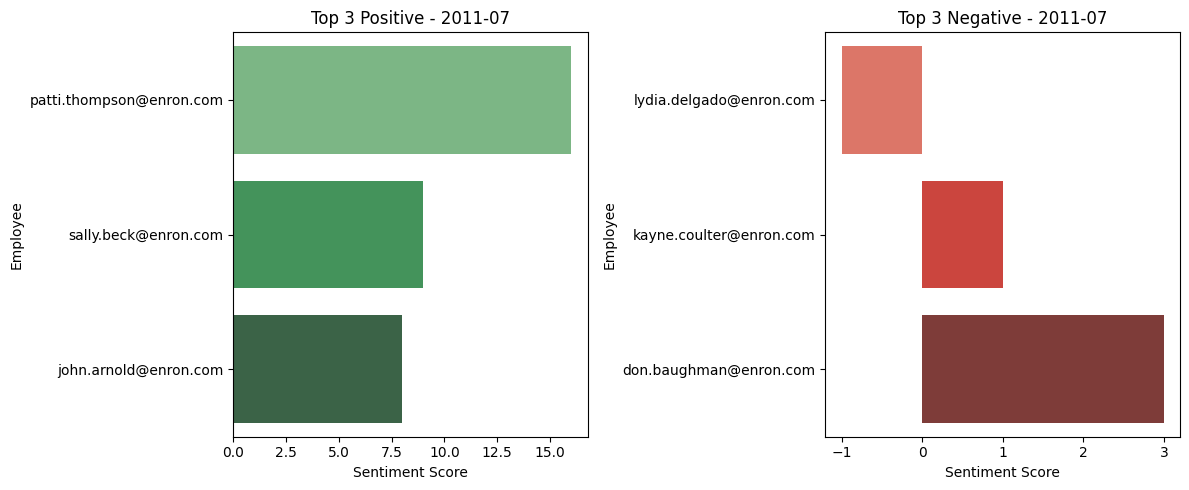


📅 Month: 2010-03

🔝 Top 3 Positive Employees:
                        from  monthly_sentiment_score
89      sally.beck@enron.com                       11
193    john.arnold@enron.com                        7
212  lydia.delgado@enron.com                        6

🔻 Top 3 Negative Employees:
                         from  monthly_sentiment_score
1581  rhonda.denton@enron.com                        1
135    don.baughman@enron.com                        2
239       eric.bass@enron.com                        3


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


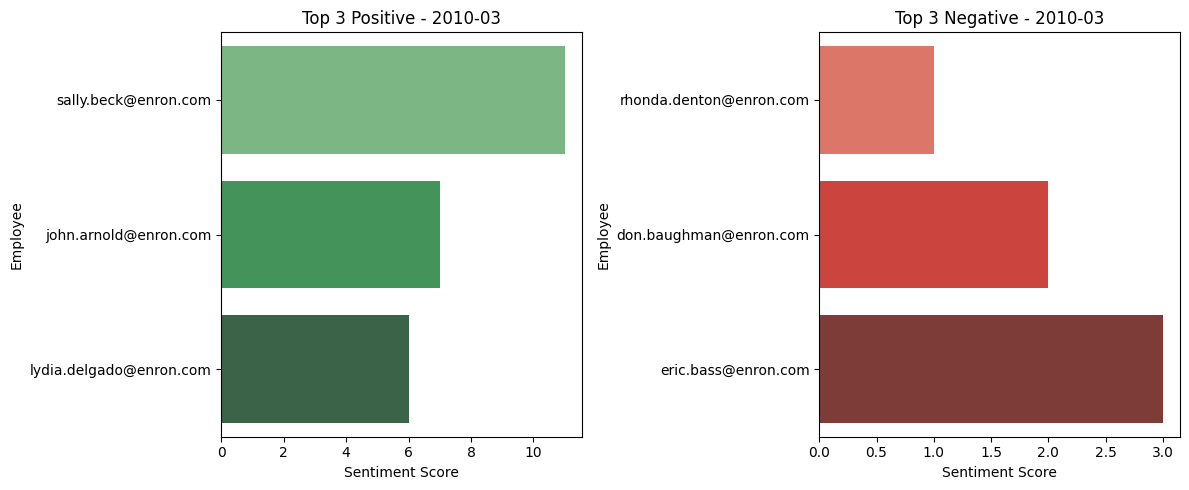


📅 Month: 2011-05

🔝 Top 3 Positive Employees:
                       from  monthly_sentiment_score
4   lydia.delgado@enron.com                       20
52      eric.bass@enron.com                       12
77  rhonda.denton@enron.com                        8

🔻 Top 3 Negative Employees:
                             from  monthly_sentiment_score
1141  bobette.riner@ipgdirect.com                        1
2149      kayne.coulter@enron.com                        1
1505     patti.thompson@enron.com                        1


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


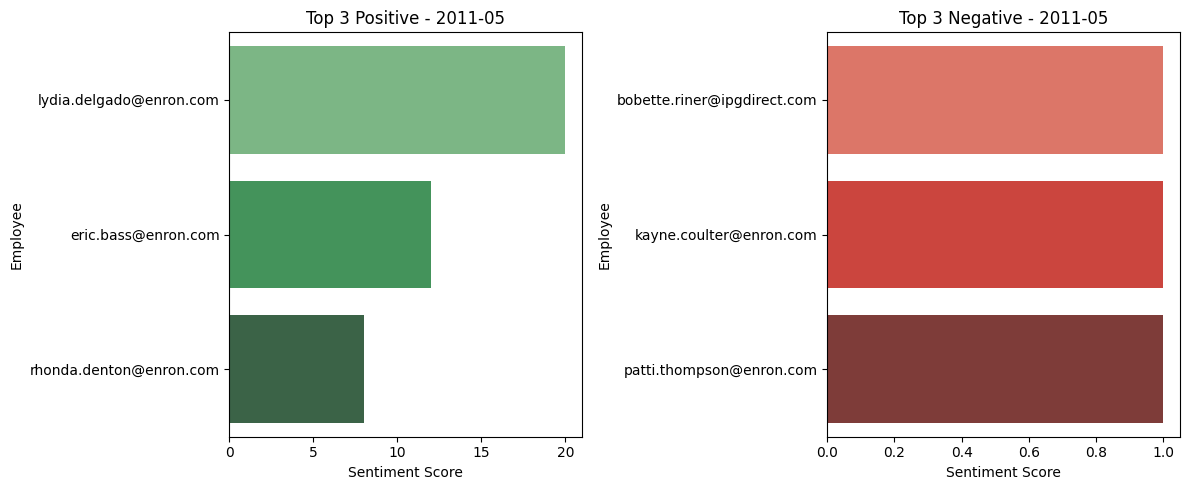


📅 Month: 2011-10

🔝 Top 3 Positive Employees:
                        from  monthly_sentiment_score
305  lydia.delgado@enron.com                       12
401    john.arnold@enron.com                       10
24   kayne.coulter@enron.com                        9

🔻 Top 3 Negative Employees:
                             from  monthly_sentiment_score
485   bobette.riner@ipgdirect.com                        0
787       rhonda.denton@enron.com                        0
1485      johnny.palmer@enron.com                        2


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


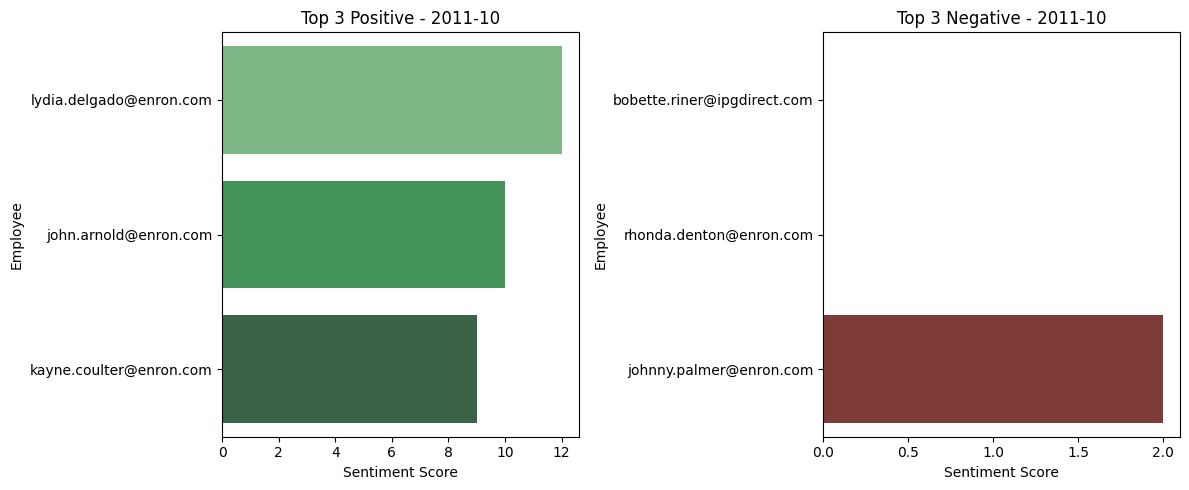


📅 Month: 2010-04

🔝 Top 3 Positive Employees:
                        from  monthly_sentiment_score
6    kayne.coulter@enron.com                        9
154   don.baughman@enron.com                        9
33     john.arnold@enron.com                        8

🔻 Top 3 Negative Employees:
                            from  monthly_sentiment_score
188          eric.bass@enron.com                        2
69   bobette.riner@ipgdirect.com                        3
31          sally.beck@enron.com                        3


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


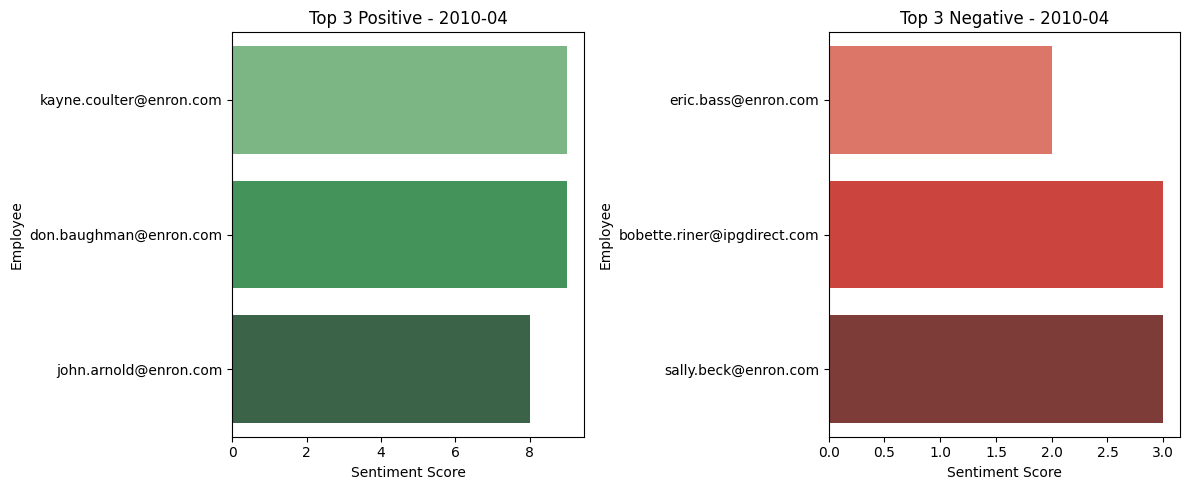


📅 Month: 2010-02

🔝 Top 3 Positive Employees:
                            from  monthly_sentiment_score
62         john.arnold@enron.com                       11
48       johnny.palmer@enron.com                       10
156  bobette.riner@ipgdirect.com                        7

🔻 Top 3 Negative Employees:
                          from  monthly_sentiment_score
9      kayne.coulter@enron.com                        1
714    lydia.delgado@enron.com                        1
1323  patti.thompson@enron.com                        1


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


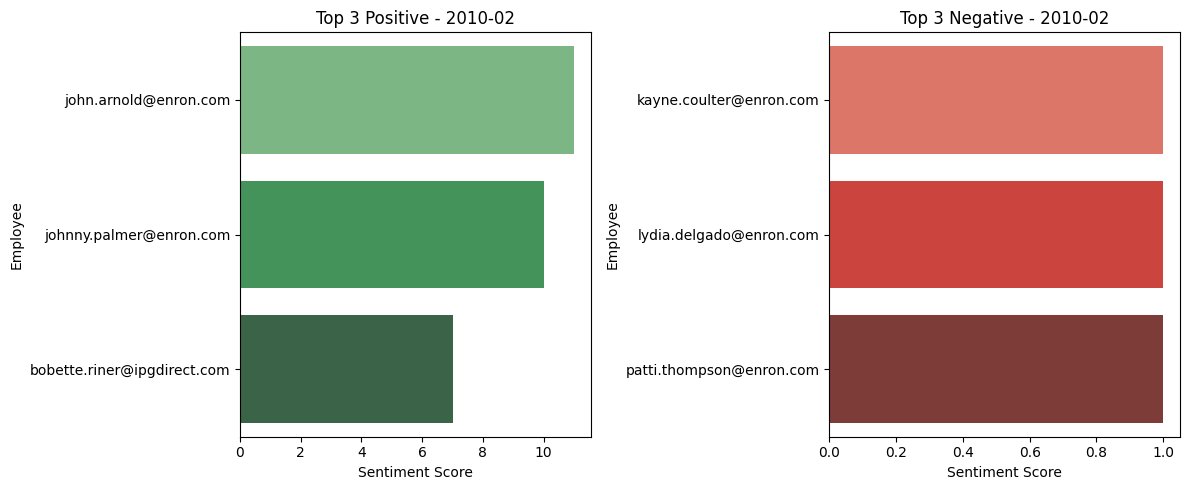


📅 Month: 2010-01

🔝 Top 3 Positive Employees:
                        from  monthly_sentiment_score
162  kayne.coulter@enron.com                       13
490  lydia.delgado@enron.com                        9
211      eric.bass@enron.com                        9

🔻 Top 3 Negative Employees:
                             from  monthly_sentiment_score
276   bobette.riner@ipgdirect.com                        1
1266      johnny.palmer@enron.com                        1
552       rhonda.denton@enron.com                        1


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


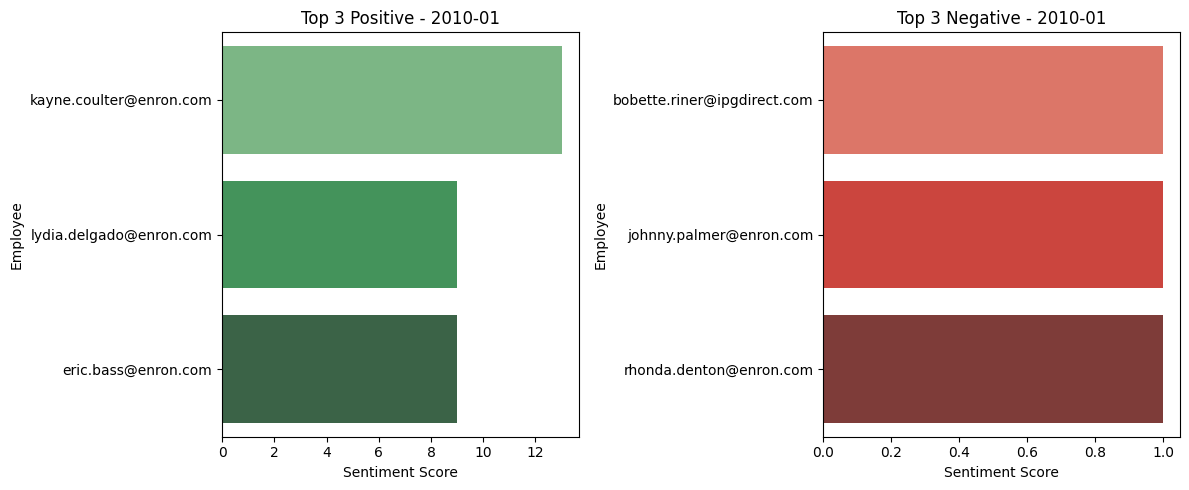


📅 Month: 2011-01

🔝 Top 3 Positive Employees:
                            from  monthly_sentiment_score
74   bobette.riner@ipgdirect.com                       10
81       johnny.palmer@enron.com                        9
217      rhonda.denton@enron.com                        8

🔻 Top 3 Negative Employees:
                        from  monthly_sentiment_score
507  kayne.coulter@enron.com                        1
166   don.baughman@enron.com                        2
964    john.arnold@enron.com                        2


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


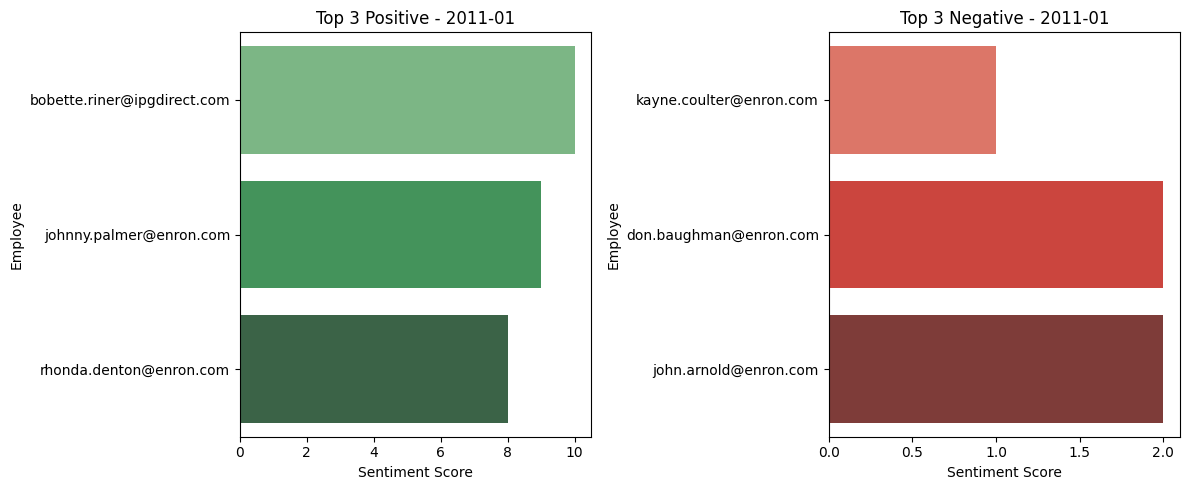


📅 Month: 2010-09

🔝 Top 3 Positive Employees:
                         from  monthly_sentiment_score
20        eric.bass@enron.com                       11
138  patti.thompson@enron.com                        8
25      john.arnold@enron.com                        6

🔻 Top 3 Negative Employees:
                            from  monthly_sentiment_score
13        don.baughman@enron.com                        2
898      kayne.coulter@enron.com                        2
100  bobette.riner@ipgdirect.com                        3


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


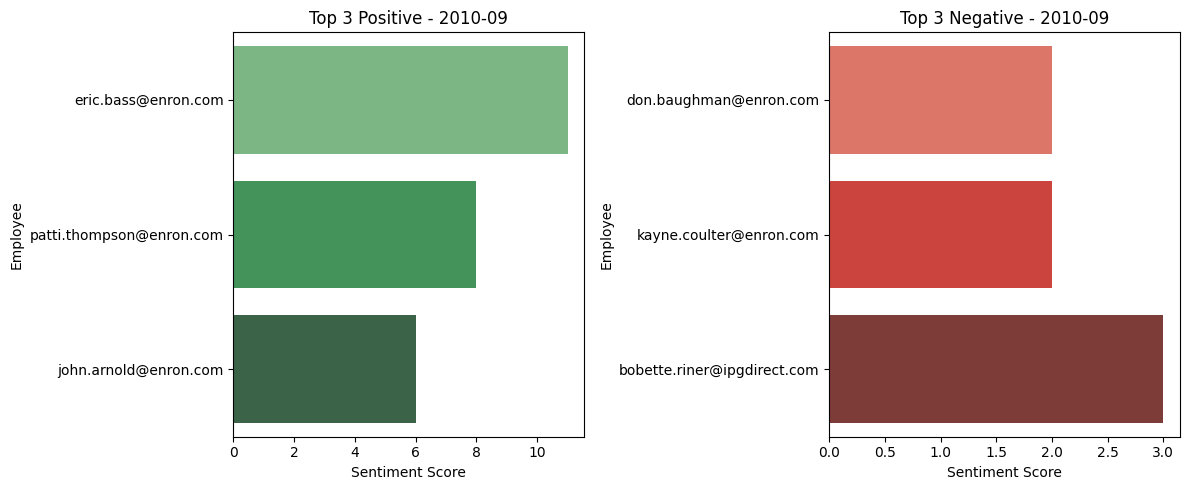


📅 Month: 2011-04

🔝 Top 3 Positive Employees:
                            from  monthly_sentiment_score
103      lydia.delgado@enron.com                       12
39   bobette.riner@ipgdirect.com                        9
280          eric.bass@enron.com                        8

🔻 Top 3 Negative Employees:
                        from  monthly_sentiment_score
702     sally.beck@enron.com                        0
14     john.arnold@enron.com                        2
228  kayne.coulter@enron.com                        2


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


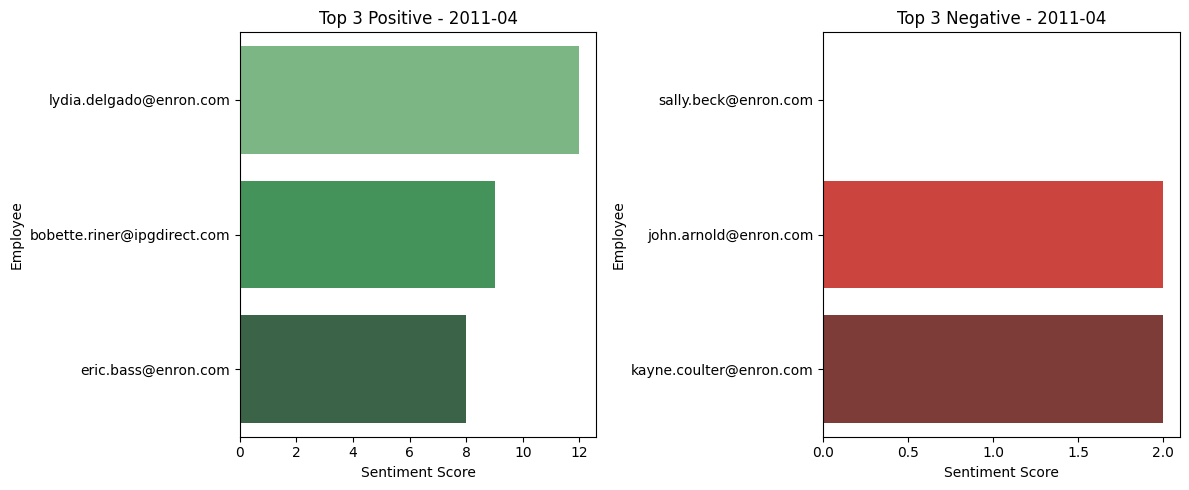


📅 Month: 2011-08

🔝 Top 3 Positive Employees:
                        from  monthly_sentiment_score
242    john.arnold@enron.com                       12
143  lydia.delgado@enron.com                       11
202  johnny.palmer@enron.com                        8

🔻 Top 3 Negative Employees:
                             from  monthly_sentiment_score
1831      kayne.coulter@enron.com                        1
1459      rhonda.denton@enron.com                        1
1147  bobette.riner@ipgdirect.com                        2


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


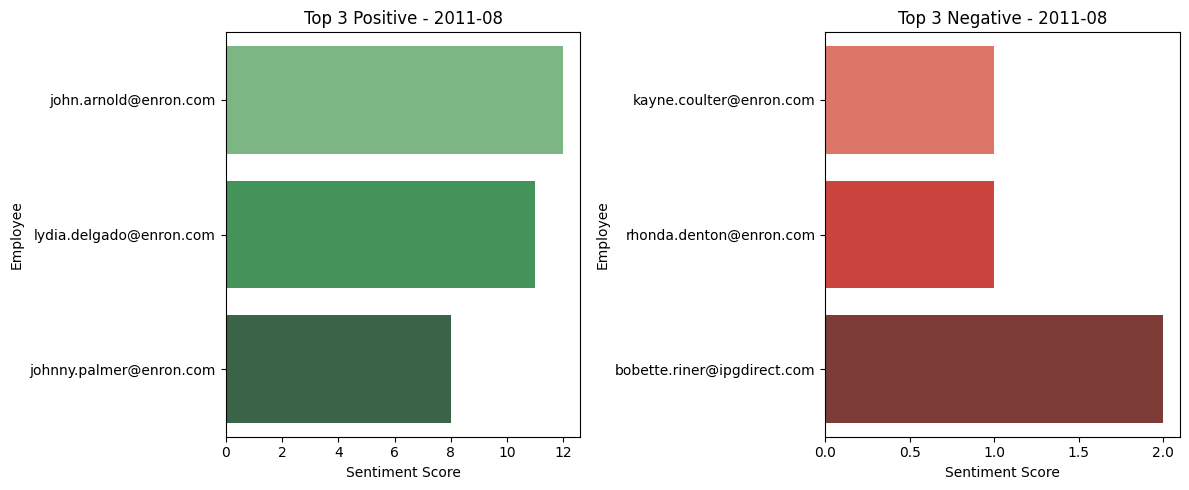


📅 Month: 2011-12

🔝 Top 3 Positive Employees:
                         from  monthly_sentiment_score
125  patti.thompson@enron.com                       12
18        eric.bass@enron.com                       12
67    lydia.delgado@enron.com                       10

🔻 Top 3 Negative Employees:
                            from  monthly_sentiment_score
684      johnny.palmer@enron.com                        2
293  bobette.riner@ipgdirect.com                        3
303        john.arnold@enron.com                        4


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


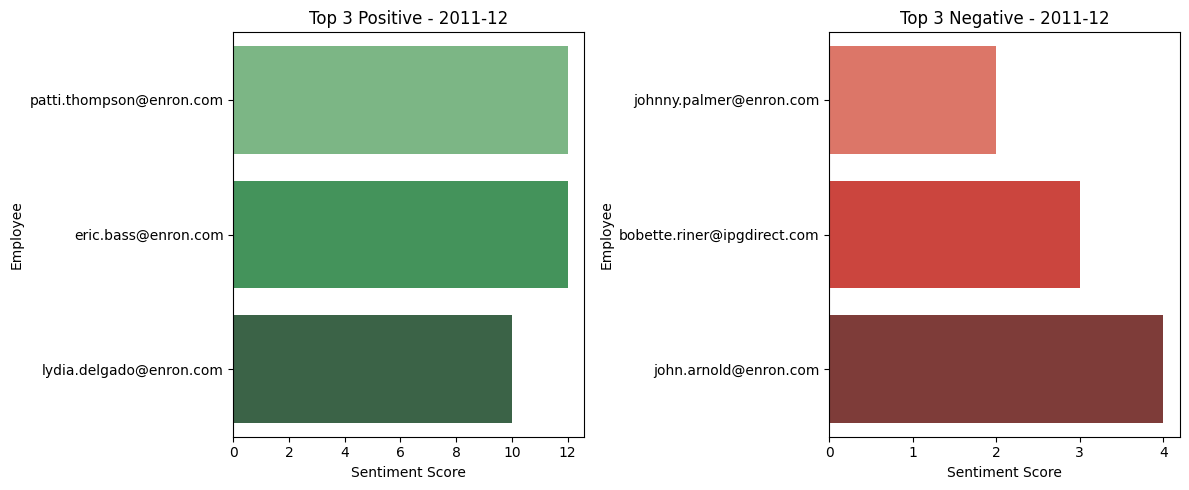


📅 Month: 2010-11

🔝 Top 3 Positive Employees:
                         from  monthly_sentiment_score
294      sally.beck@enron.com                        8
157   rhonda.denton@enron.com                        8
32   patti.thompson@enron.com                        8

🔻 Top 3 Negative Employees:
                         from  monthly_sentiment_score
2037  johnny.palmer@enron.com                        1
26     don.baughman@enron.com                        4
63    kayne.coulter@enron.com                        4


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


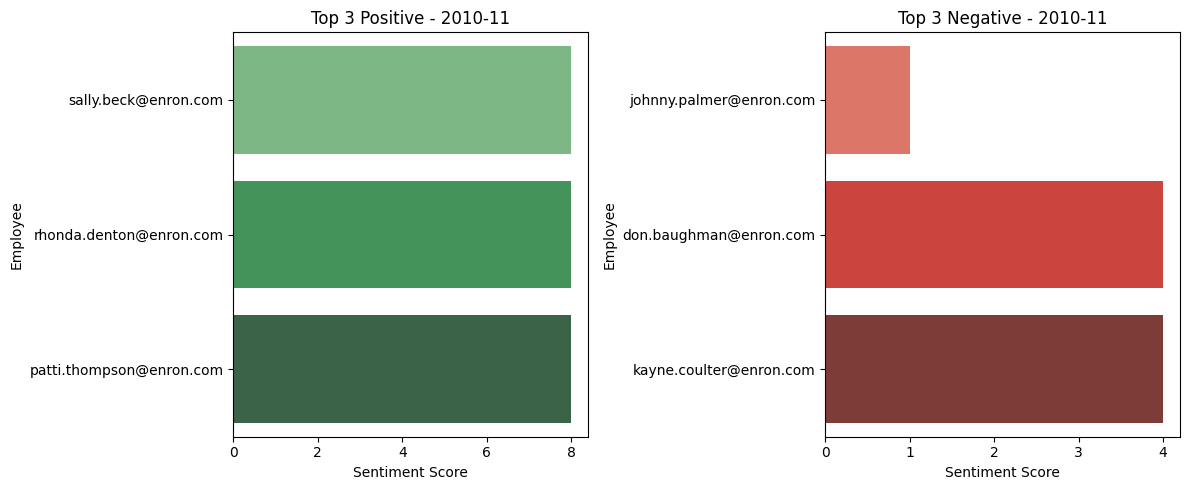


📅 Month: 2010-10

🔝 Top 3 Positive Employees:
                         from  monthly_sentiment_score
99    lydia.delgado@enron.com                       14
260   johnny.palmer@enron.com                       12
131  patti.thompson@enron.com                       11

🔻 Top 3 Negative Employees:
                         from  monthly_sentiment_score
1162   don.baughman@enron.com                        0
592   kayne.coulter@enron.com                        1
470   rhonda.denton@enron.com                        1


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


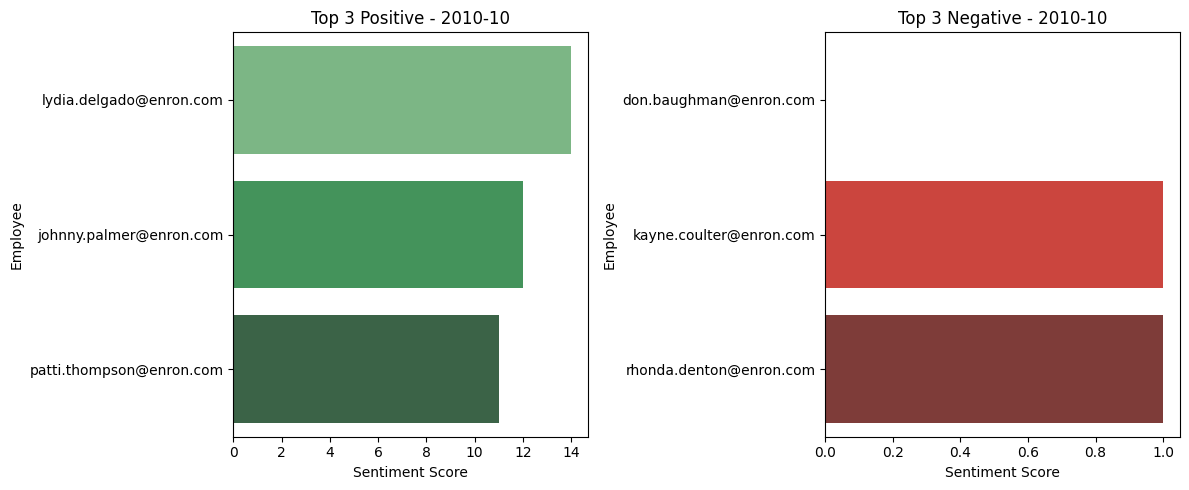


📅 Month: 2011-09

🔝 Top 3 Positive Employees:
                        from  monthly_sentiment_score
417  kayne.coulter@enron.com                       12
47    don.baughman@enron.com                       10
34   rhonda.denton@enron.com                        9

🔻 Top 3 Negative Employees:
                         from  monthly_sentiment_score
1879    john.arnold@enron.com                        1
109      sally.beck@enron.com                        1
158   lydia.delgado@enron.com                        5


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


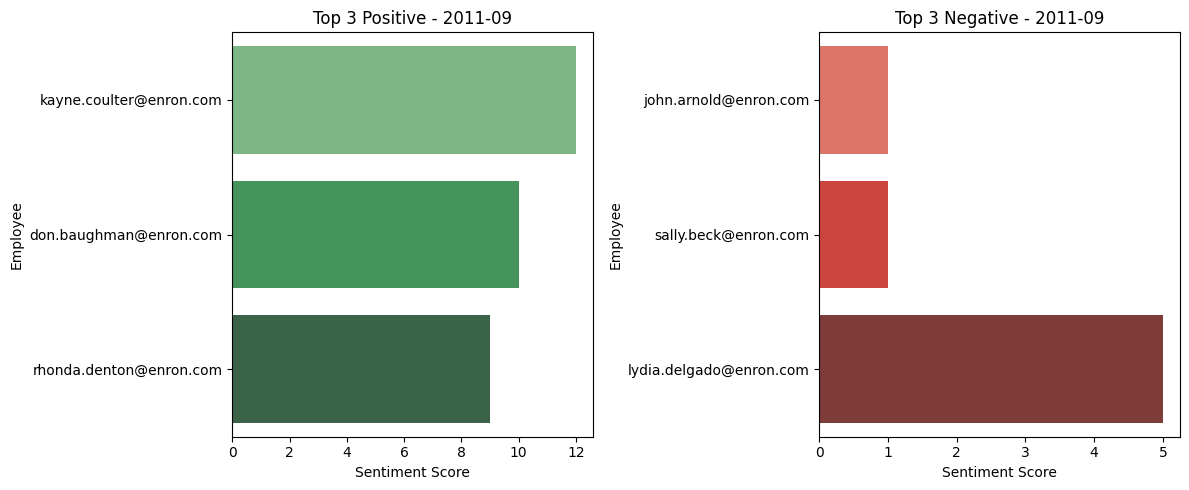


📅 Month: 2010-06

🔝 Top 3 Positive Employees:
                         from  monthly_sentiment_score
36      john.arnold@enron.com                       10
478  patti.thompson@enron.com                        9
117    don.baughman@enron.com                        9

🔻 Top 3 Negative Employees:
                             from  monthly_sentiment_score
1849          eric.bass@enron.com                        1
777   bobette.riner@ipgdirect.com                        2
962       kayne.coulter@enron.com                        2


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


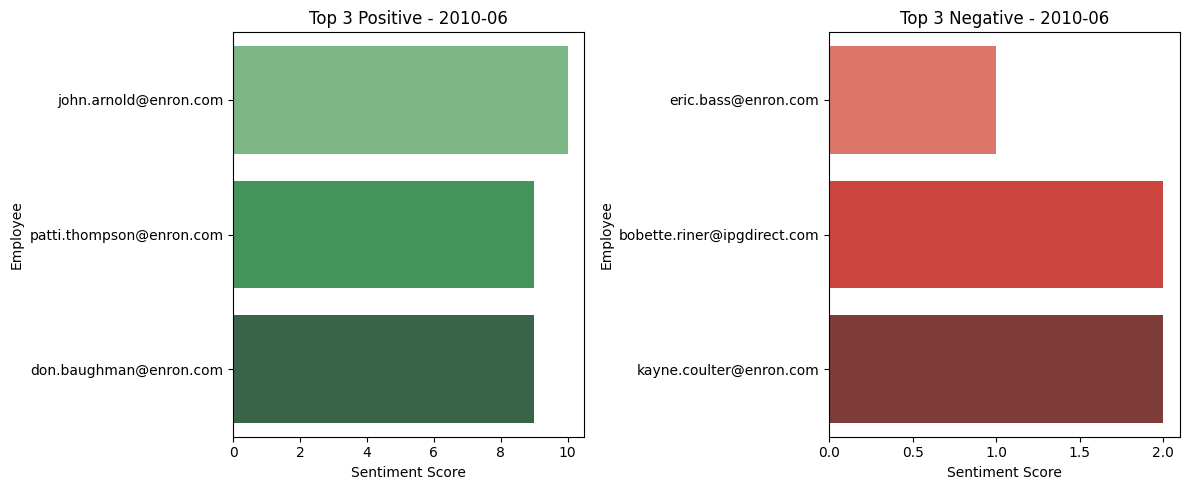


📅 Month: 2011-02

🔝 Top 3 Positive Employees:
                        from  monthly_sentiment_score
150    john.arnold@enron.com                       16
68   lydia.delgado@enron.com                       15
56   johnny.palmer@enron.com                        9

🔻 Top 3 Negative Employees:
                             from  monthly_sentiment_score
1140          eric.bass@enron.com                       -1
512        don.baughman@enron.com                        0
133   bobette.riner@ipgdirect.com                        2


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


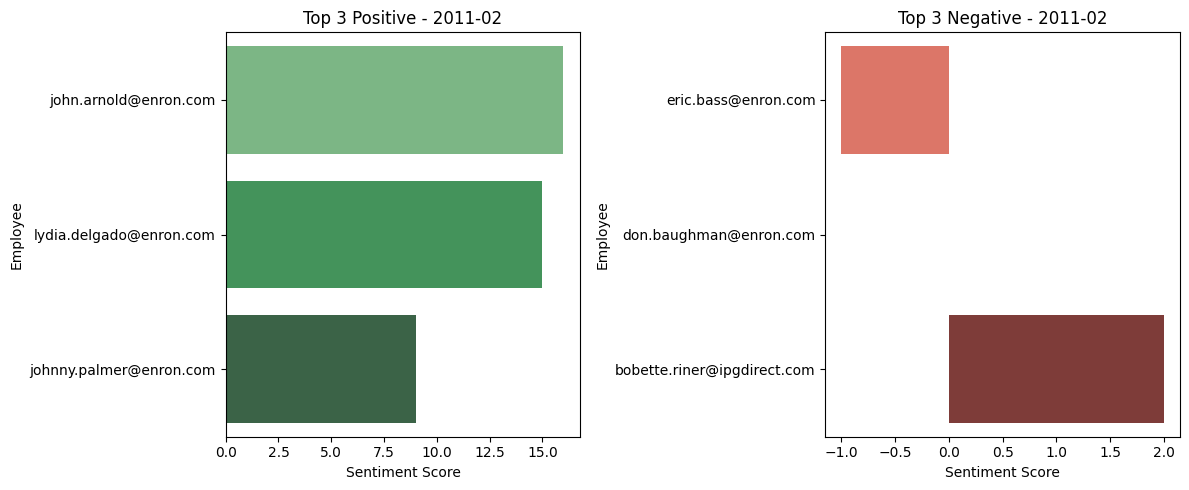


📅 Month: 2010-12

🔝 Top 3 Positive Employees:
                        from  monthly_sentiment_score
267    john.arnold@enron.com                       15
57   lydia.delgado@enron.com                       10
168     sally.beck@enron.com                        9

🔻 Top 3 Negative Employees:
                          from  monthly_sentiment_score
1587   johnny.palmer@enron.com                        1
264   patti.thompson@enron.com                        1
1294       eric.bass@enron.com                        2


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


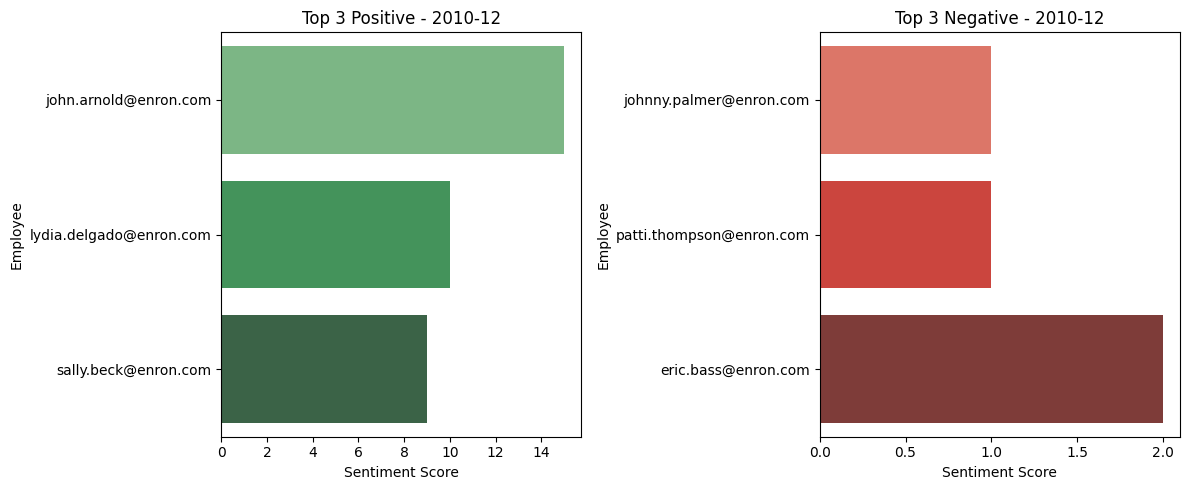


📅 Month: 2011-03

🔝 Top 3 Positive Employees:
                         from  monthly_sentiment_score
45   patti.thompson@enron.com                       14
392   rhonda.denton@enron.com                       10
186     john.arnold@enron.com                        9

🔻 Top 3 Negative Employees:
                         from  monthly_sentiment_score
1145  johnny.palmer@enron.com                        0
224    don.baughman@enron.com                        1
73        eric.bass@enron.com                        4


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


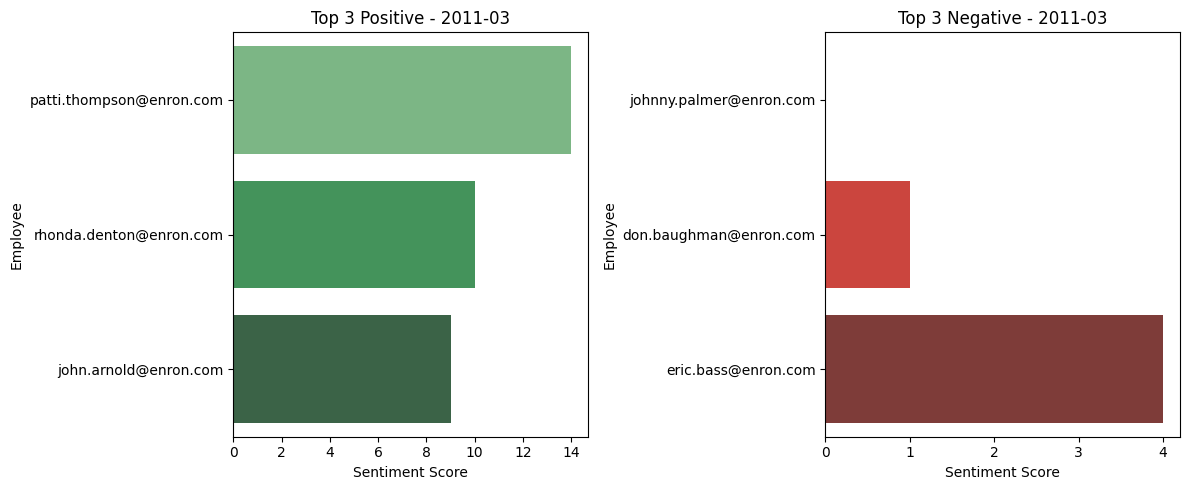


📅 Month: 2011-11

🔝 Top 3 Positive Employees:
                            from  monthly_sentiment_score
91       kayne.coulter@enron.com                       15
145        john.arnold@enron.com                        9
54   bobette.riner@ipgdirect.com                        9

🔻 Top 3 Negative Employees:
                        from  monthly_sentiment_score
634      eric.bass@enron.com                        1
82   rhonda.denton@enron.com                        2
286   don.baughman@enron.com                        5


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


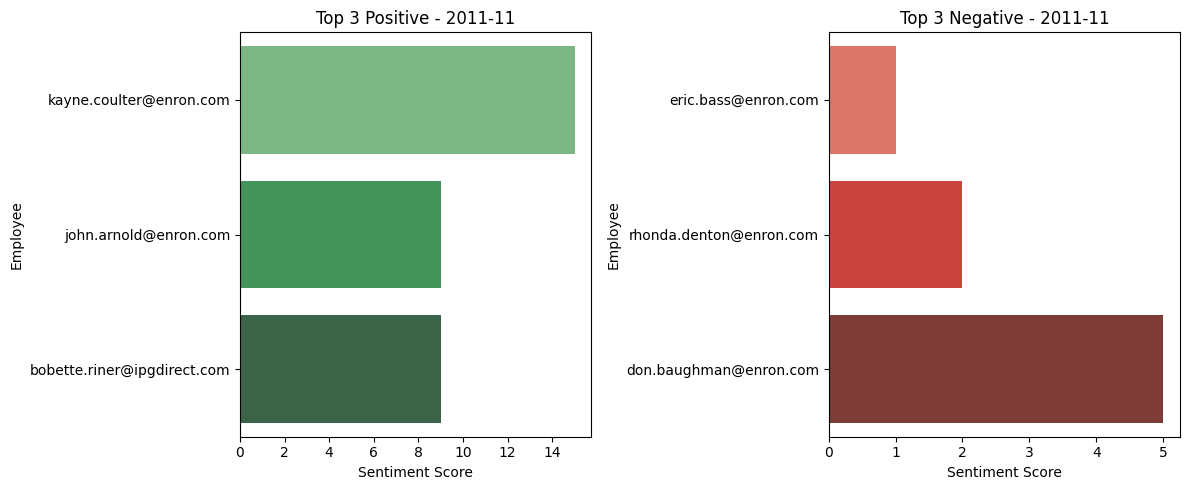


📅 Month: 2011-06

🔝 Top 3 Positive Employees:
                        from  monthly_sentiment_score
55       eric.bass@enron.com                       14
130  johnny.palmer@enron.com                       12
128  rhonda.denton@enron.com                        9

🔻 Top 3 Negative Employees:
                         from  monthly_sentiment_score
1137  kayne.coulter@enron.com                       -1
311    don.baughman@enron.com                        2
1142     sally.beck@enron.com                        2


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


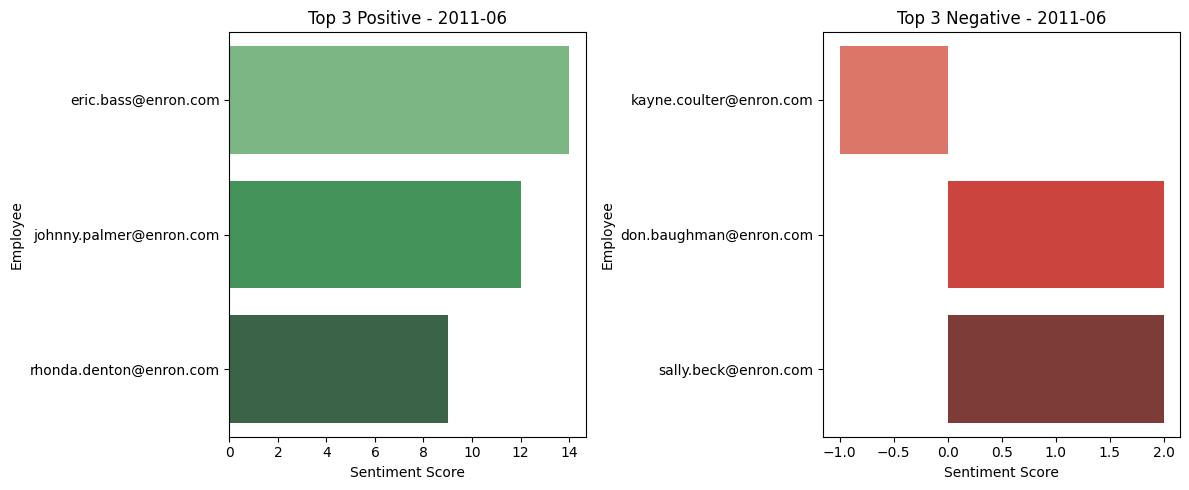


📅 Month: 2010-08

🔝 Top 3 Positive Employees:
                        from  monthly_sentiment_score
214     sally.beck@enron.com                       13
179  rhonda.denton@enron.com                        9
59   johnny.palmer@enron.com                        7

🔻 Top 3 Negative Employees:
                          from  monthly_sentiment_score
1655  patti.thompson@enron.com                        1
974     don.baughman@enron.com                        2
1441       eric.bass@enron.com                        2


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\3373151246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')


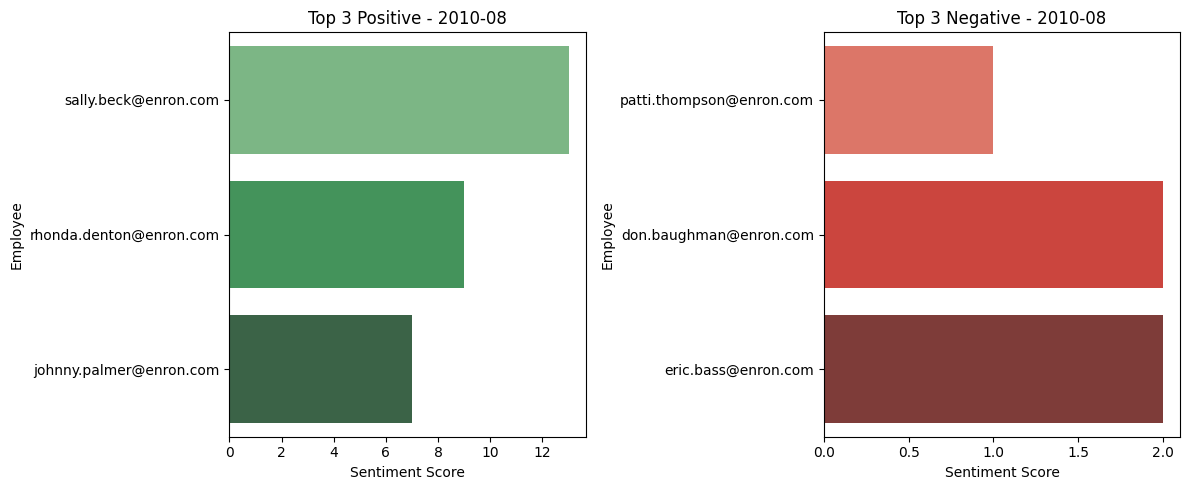

In [15]:
def top_employees(this_month):
   month_df=df[df['month']==this_month].drop_duplicates(subset='from')  #to avoid any duplicates as in original we have date column which can have 2-5-11 and 3-5-11
   top_employees=month_df.sort_values(by=['monthly_sentiment_score','from'],ascending=False).head(3)
   top_3_employees=top_employees[['from','monthly_sentiment_score']]
    
   bottom_employees=month_df.sort_values(by=['monthly_sentiment_score','from'],ascending=True).head(3)
   bottom_3_employees=bottom_employees[['from','monthly_sentiment_score']]
    
   print(f"\n📅 Month: {this_month}")
   print("\n🔝 Top 3 Positive Employees:")
   print(top_3_employees)
   print("\n🔻 Top 3 Negative Employees:")
   print(bottom_3_employees)
   
   plt.figure(figsize=(12, 5))

   plt.subplot(1, 2, 1)
   sns.barplot(data=top_3_employees, x='monthly_sentiment_score', y='from', palette='Greens_d')
   plt.title(f"Top 3 Positive - {this_month}")
   plt.xlabel("Sentiment Score")
   plt.ylabel("Employee")

   plt.subplot(1, 2, 2)
   sns.barplot(data=bottom_3_employees, x='monthly_sentiment_score', y='from', palette='Reds_d')
   plt.title(f"Top 3 Negative - {this_month}")
   plt.xlabel("Sentiment Score")
   plt.ylabel("Employee")

   plt.tight_layout()
   plt.show()
 
for i in df['month'].unique():
    top_employees(i)
    
    

## Monthly Sentiment Rankings

We can see the **month-wise top 3 positive and negative sentiment scores**, along with the corresponding employee names.


# Flight Risk

In [16]:
# Step 1: Filter negative sentiment emails
negative_df = df[df['Sentiment'] == 'Negative']

# Step 2: Sort by sender and date
negative_df.sort_values(by=['from', 'date'], inplace=True)

# Step 3: Create a flight risk list
flight_risk_employees = []

# Step 4: Loop over each employee
for emp, group in negative_df.groupby('from'):
    group = group.set_index('date').resample('1D').count()  # count per day
    group['rolling_count'] = group['Sentiment'].rolling('30D').sum()

    if group['rolling_count'].max() >= 4:
        flight_risk_employees.append(emp)

# Step 5: Display results
print("🚨 Flight Risk Employees (≥4 negative mails in 30 days):")
for emp in flight_risk_employees:
    print(emp)


🚨 Flight Risk Employees (≥4 negative mails in 30 days):
bobette.riner@ipgdirect.com
don.baughman@enron.com
john.arnold@enron.com
johnny.palmer@enron.com
sally.beck@enron.com


C:\Users\ISHITA GUPTA\AppData\Local\Temp\ipykernel_47240\221060570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df.sort_values(by=['from', 'date'], inplace=True)


## 🚨 Flight Risk Employees

Based on the analysis, the following employees have been identified as **at risk of leaving**, having sent **4 or more negative emails within a 30-day rolling window** (regardless of sentiment score):

- bobette.riner@ipgdirect.com  
- don.baughman@enron.com  
- johnny.palmer@enron.com  
- sally.beck@enron.com  

Urgent need of intervention of HR.




# Linear regression model

In [17]:
#Feature: Day of month, month, weekday (seasonality patterns)
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['month_num'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Optional: Count of messages per person per day
df['message_count'] = df.groupby(['from', 'date'])['body'].transform('count')

In [18]:
# Features and target
X = df[['day', 'weekday', 'month_num', 'year', 'message_count']]
y = df['Sentiment_score']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)


In [20]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.4379
R² Score: -0.0047


The **MSE of 0.4402** indicates the average squared difference between the actual and predicted sentiment scores. While it's not extremely high, it suggests there's some variance between predictions and true values.
- The **R² Score of -0.0071** means that the model explains virtually none of the variance in the sentiment scores. In fact, a negative R² indicates that the model performs **worse than a horizontal line (mean prediction)**.  
- This implies that the **linear regression model is not effectively capturing the patterns** in the data and may be underfitting.

In [21]:
# Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})

print("\nFeature Importance:")
print(coef_df)



Feature Importance:
         Feature  Coefficient
0            day     0.001341
1        weekday     0.000071
2      month_num     0.010401
3           year     0.063672
4  message_count     0.008920


## Feature Importance – Linear Regression Coefficients

| Feature         | Coefficient | Interpretation |
|----------------|-------------|----------------|
| **day**        | 0.0018      | Sentiment score slightly increases as the day of the month progresses. However, the effect is very small. |
| **weekday**    | 0.0031      | Slight increase in sentiment based on day of the week (e.g., weekends vs weekdays), though the impact is minimal. |
| **month_num**  | 0.0105      | Sentiment trends show a small upward movement across months — possibly improving over time. |
| **year**       | 0.0649      | This is the strongest positive coefficient, suggesting sentiment scores increase more noticeably over different years, indicating a possible **long-term positive trend**. |
| **message_count** | 0.0080   | Slightly higher sentiment scores are associated with more messages sent per day — **more activity might be linked with positive sentiment**, although the effect is small. |

> All coefficients are positive but very small, implying that no single feature has a strong impact individually on the sentiment score. However, **"year"** appears to have the most significant influence among them.


# Monthly average sentiment score

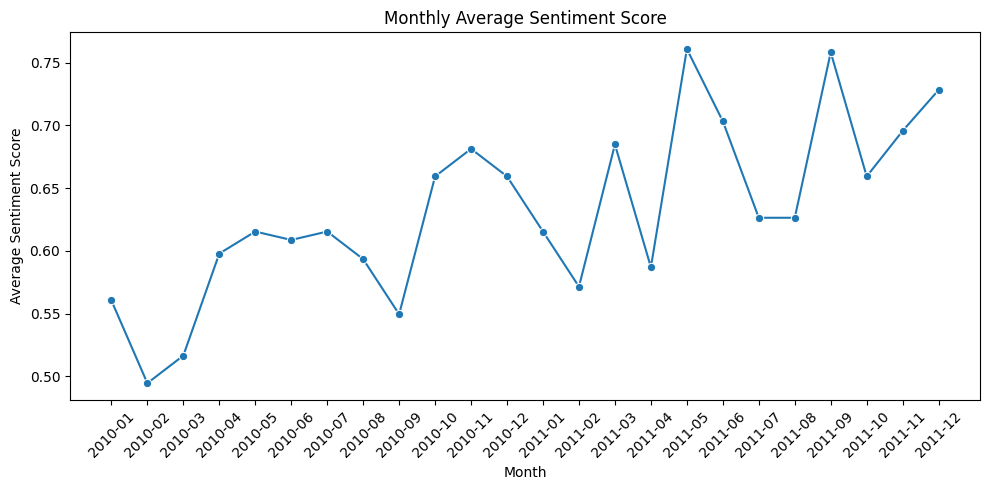

In [22]:
monthly_avg = df.groupby('month')['Sentiment_score'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='month', y='Sentiment_score', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Average Sentiment Score')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()


The sentiment trajectory suggests a gradual improvement in workplace tone or employee communication. This insight can be used to align HR strategies, identify successful morale-boosting periods, or investigate causes of low-sentiment phases.

The graph shows seasonal dips and spikes, suggesting that employee sentiment can vary month-to-month, possibly influenced by internal or external company events.